#First Order Process


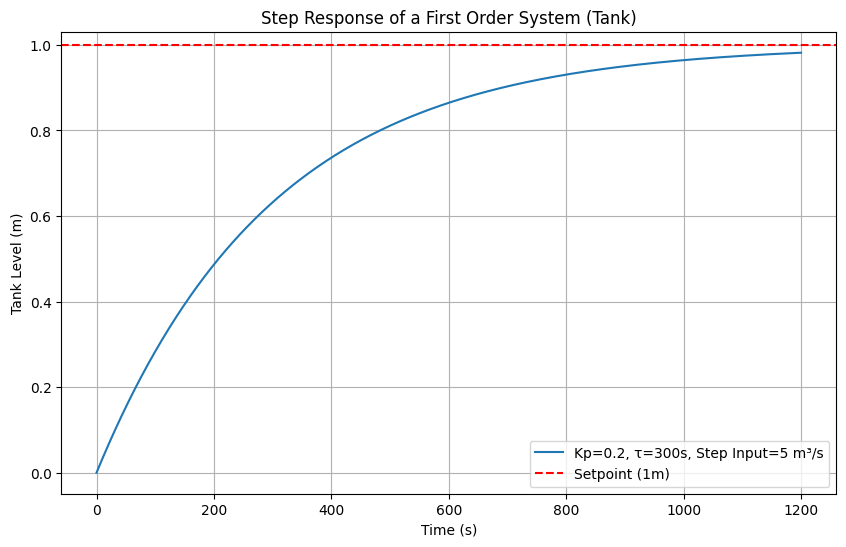

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# First Order System Parameters
Kp = 0.2
tau = 300
setpoint = 1
step_input = 5

# Transfer Function G(s) = Kp / (tau*s + 1)
num = [Kp]
den = [tau, 1]
system = signal.TransferFunction(num, den)

# Generation of time and step response
t = np.linspace(0, 1200, 1000)
t, y = signal.step(system, T=t)

# Adjusting the step response for input of 5 m³/s

y = y * step_input

# Plotting step input
plt.figure(figsize=(10, 6))
plt.plot(t, y, label=f'Kp={Kp}, τ={tau}s, Step Input={step_input} m³/s')
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint (1m)')

plt.xlabel('Time (s)')
plt.ylabel('Tank Level (m)')
plt.title('Step Response of a First Order System (Tank)')
plt.legend()
plt.grid(True)
plt.show()


#Second Order Process

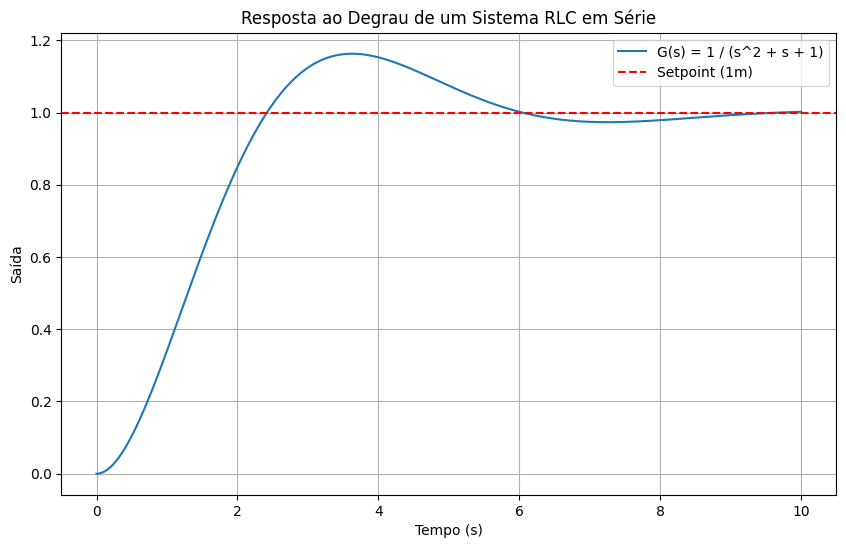

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Parâmetros do sistema RLC
L = 1  # Henry
R = 1  # Ohm
C = 1  # Farad

# Função de transferência G(s) = 1 / (Ls^2 + Rs + 1/C)
num = [1]
den = [L, R, 1]
system = signal.TransferFunction(num, den)

# Geração do tempo e da resposta ao degrau
t = np.linspace(0, 10, 1000)
t, y = signal.step(system, T=t)

# Plotando a resposta ao degrau
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='G(s) = 1 / (s^2 + s + 1)')
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint (1m)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao Degrau de um Sistema RLC em Série')
plt.legend()
plt.grid(True)
plt.show()


#Processo de Segunda Ordem com Pico Inicial e Convergência

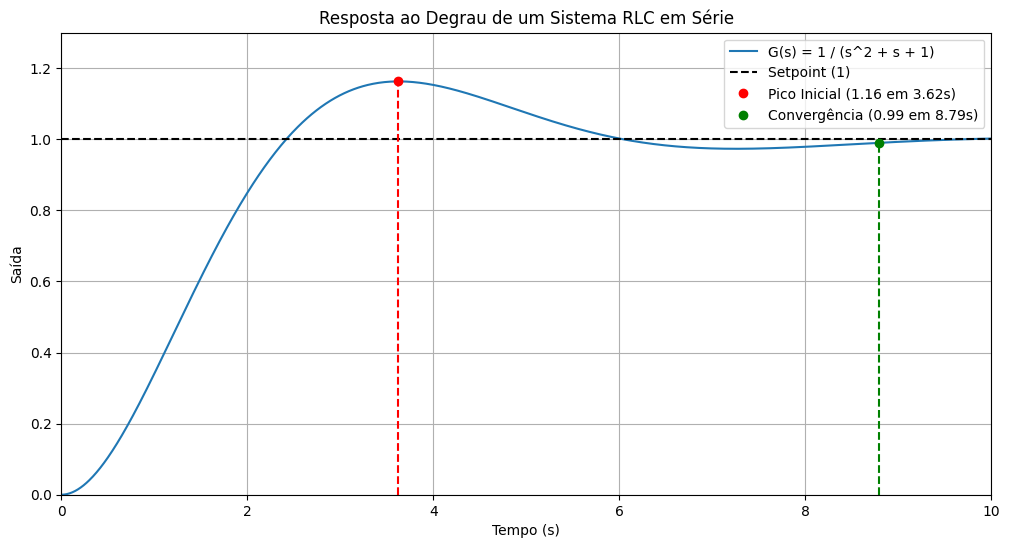

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Parâmetros do sistema RLC
L = 1  # Henry
R = 1  # Ohm
C = 1  # Farad

# Função de transferência G(s) = 1 / (Ls^2 + Rs + 1/C)
num = [1]
den = [L, R, 1]
system = signal.TransferFunction(num, den)

# Geração do tempo e da resposta ao degrau
t = np.linspace(0, 10, 1000)
t, y = signal.step(system, T=t)

# Encontrando o pico inicial
peak_index = np.argmax(y)
peak_time = t[peak_index]
peak_value = y[peak_index]

# Encontrando o ponto de convergência após o pico inicial
convergence_value = 1.0  # setpoint
tolerance = 0.01 * convergence_value  # 1% tolerance

# Encontrar o ponto onde a resposta se mantém dentro da tolerância de 1%
for i in range(peak_index, len(y)):
    if np.all(np.abs(y[i:] - convergence_value) <= tolerance):
        convergence_index = i
        break

convergence_time = t[convergence_index]
convergence_value_at_index = y[convergence_index]

# Plotando a resposta ao degrau
plt.figure(figsize=(12, 6))
plt.xlim(0, 10)
plt.ylim(0, 1.3)
plt.plot(t, y, label='G(s) = 1 / (s^2 + s + 1)')
plt.axhline(convergence_value, color='black', linestyle='--', label='Setpoint (1)')
plt.plot(peak_time, peak_value, 'ro', label=f'Pico Inicial ({peak_value:.2f} em {peak_time:.2f}s)')
plt.plot(convergence_time, convergence_value_at_index, 'go', label=f'Convergência ({convergence_value_at_index:.2f} em {convergence_time:.2f}s)')
# Linhas verticais conectando os pontos ao eixo x
plt.plot([peak_time, peak_time], [0, peak_value], 'r--')
plt.plot([convergence_time, convergence_time], [0, convergence_value_at_index], 'g--')

plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao Degrau de um Sistema RLC em Série')
plt.legend()
plt.grid(True)
plt.show()


